<a href="https://colab.research.google.com/github/Deekshith238/codesoft_task02/blob/main/Task_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD
DETECTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
train = pd.read_csv('/content/fraudTrain.csv')
test = pd.read_csv('/content/fraudTest.csv')

In [ ]:
data = pd.concat([train, test])

In [ ]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,852850.000000,8.528500e+05,852850.000000,852848.000000,852848.000000,852848.000000,8.528480e+05,8.528480e+05,852848.000000,852848.000000,852848.000000
mean,285252.261359,4.174019e+17,70.043379,48789.100154,38.539087,-90.217790,8.893348e+04,1.346164e+09,38.538646,-90.217880,0.005585
std,201700.785690,1.309253e+18,156.747238,26897.189648,5.072610,13.757904,3.023080e+05,1.579721e+07,5.107221,13.770197,0.074523
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,106606.000000,1.800365e+14,9.650000,26237.000000,34.668900,-96.798000,7.430000e+02,1.334806e+09,34.746294,-96.886282,0.000000
50%,247869.500000,3.519607e+15,47.400000,48174.000000,39.354300,-87.461600,2.456000e+03,1.341927e+09,39.369580,-87.425196,0.000000
75%,461081.750000,4.642255e+15,83.030000,72011.000000,41.940400,-80.158000,2.032800e+04,1.348921e+09,41.956073,-80.223630,0.000000
max,674294.000000,4.992346e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.377247e+09,67.510267,-66.952352,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(674295, 23)
(178555, 23)


In [ ]:
display(data.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2020-06-21 12:14:25     2291163933867244   
1                1   2020-06-21 12:14:33     3573030041201292   
2                2   2020-06-21 12:14:53     3598215285024754   
3                3   2020-06-21 12:15:15     3591919803438423   
4                4   2020-06-21 12:15:17     3526826139003047   
...            ...                   ...                  ...   
178550      178550   2020-08-23 08:32:23     3540210836308425   
178551      178551   2020-08-23 08:32:24        4990494243023   
178552      178552   2020-08-23 08:33:25         676102124465   
178553      178553   2020-08-23 08:34:20      348379466427142   
178554      178554   2020-08-23 08:35:17  4503101193493052864   

                                    merchant        category     amt  \
0                      fraud_Kirlin and Sons   personal_care    2.86   
1                       fraud_Sporer-Keebler   personal_care   29.84   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   
3                          fraud_Haley Group        misc_pos   60.05   
4                      fraud_Johnston-Casper          travel    3.19   
...                                      ...             ...     ...   
178550                fraud_Balistreri-Nader        misc_pos   30.94   
178551                fraud_Volkman-Predovic    shopping_net   44.81   
178552               fraud_Cartwright-Harris     grocery_pos  217.35   
178553                 fraud_Turner and Sons    shopping_pos    9.15   
178554                   fraud_Auer-Mosciski     grocery_pos  187.83   

            first        last gender                       street  ...  \
0            Jeff     Elliott      M            351 Darlene Green  ...   
1          Joanne    Williams      F             3638 Marsh Union  ...   
2          Ashley       Lopez      F         9333 Valentine Point  ...   
3           Brian    Williams      M  32941 Krystal Mill Apt. 552  ...   
4          Nathan      Massey      M     5783 Evan Roads Apt. 465  ...   
...           ...         ...    ...                          ...  ...   
178550     Steven       Yoder      M    94975 David Mews Apt. 316  ...   
178551     Martin        Ford      M         56812 Francis Courts  ...   
178552    Natasha  Mclaughlin      F   8699 Lindsay Ford Apt. 486  ...   
178553    Michael        Rowe      M          7428 Martinez Flats  ...   
178554  Katherine      Tucker      F     670 Le Meadows Suite 250  ...   

            lat      long  city_pop                     job         dob  \
0       33.9659  -80.9355  333497.0     Mechanical engineer  1968-03-19   
1       40.3207 -110.4360     302.0  Sales professional, IT  1990-01-17   
2       40.6729  -73.5365   34496.0       Librarian, public  1970-10-21   
3       28.5697  -80.8191   54767.0            Set designer  1987-07-25   
4       44.2529  -85.0170    1126.0      Furniture designer  1955-07-06   
...         ...       ...       ...                     ...         ...   
178550  34.7437 -102.5064      53.0       Fisheries officer  1992-06-19   
178551  39.6967  -78.8031     626.0         Energy engineer  1960-12-13   
178552  38.4549 -122.2564   94014.0           Airline pilot  1985-08-21   
178553  28.1384  -80.6524  139650.0  Database administrator  1957-01-23   
178554      NaN       NaN       NaN                     NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                  ...      

In [ ]:
train.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2019-01-01 00:00:18     2703186189652095   
1                1   2019-01-01 00:00:44         630423337322   
2                2   2019-01-01 00:00:51       38859492057661   
3                3   2019-01-01 00:01:16     3534093764340240   
4                4   2019-01-01 00:03:06      375534208663984   
...            ...                   ...                  ...   
674290      674290   2019-10-14 09:11:40      213193596103206   
674291      674291   2019-10-14 09:11:42      213193596103206   
674292      674292   2019-10-14 09:12:09  4792627764422477317   
674293      674293   2019-10-14 09:15:24       30407675418785   
674294      674294   2019-10-14 09:15:32       30235438713303   

                                  merchant       category     amt      first  \
0               fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge  entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist       misc_pos   41.96      Tyler   
...                                    ...            ...     ...        ...   
674290                   fraud_Schmitt Ltd       misc_net   74.66      James   
674291                 fraud_Dickinson Ltd       misc_pos   38.45      James   
674292                      fraud_Cole PLC    grocery_pos  175.47   Margaret   
674293  fraud_Osinski, Ledner and Leuschke    grocery_pos   92.39   Danielle   
674294                  fraud_Bailey-Morar    grocery_pos   65.09      James   

           last gender                        street  ...      lat      long  \
0         Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1          Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2       Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3         White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4        Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
...         ...    ...                           ...  ...      ...       ...   
674290     Hunt      M           7369 Gabriel Tunnel  ...  45.7549  -84.4470   
674291     Hunt      M           7369 Gabriel Tunnel  ...  45.7549  -84.4470   
674292   Mendez      F               7952 Karen Pike  ...  38.9462  -94.9714   
674293    Evans      F    76752 David Lodge Apt. 064  ...  42.1939  -76.7361   
674294  Baldwin      M                  3603 Mitchel  ...      NaN       NaN   

        city_pop                                job         dob  \
0         3495.0          Psychologist, counselling  1988-03-09   
1          149.0  Special educational needs teacher  1978-06-21   
2         4154.0        Nature conservation officer  1962-01-19   
3         1939.0                    Patent attorney  1967-01-12   
4           99.0     Dance movement psychotherapist  1986-03-28   
...          ...                                ...         ...   
674290      95.0                Electrical engineer  1994-02-09   
674291      95.0                Electrical engineer  1994-02-09   
674292    5760.0            Chief Executive Officer  1978-10-01   
674293     520.0                    Psychotherapist  1991-10-13   
674294       NaN                                NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1.325376e+09 

Converting Categorical Data to Numerical Data using Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
label_encode_cols = ['merchant', 'category', 'gender','state','job']
for col in label_encode_cols:
  le=LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

  train[col] = le.fit_transform(train[col])
  label_encoders[col] = le

  test[col] = le.fit_transform(test[col])
  label_encoders[col] = le

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

In [ ]:
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

In [ ]:
data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

In [ ]:
train['trancation_year'] = train['trans_date_trans_time'].dt.year
train['trancation_month'] = train['trans_date_trans_time'].dt.month
train['trancation_day'] = train['trans_date_trans_time'].dt.day
train['trancation_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

In [ ]:
train.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)

In [ ]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

In [ ]:
test['transactions_year'] = test['trans_date_trans_time'].dt.year
test['transactions_month'] = test['trans_date_trans_time'].dt.month
test['transactions_day'] = test['trans_date_trans_time'].dt.day
test['transactions_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

In [ ]:
test.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)

In [ ]:
data.drop(['first','last','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'],axis=1,inplace=True)
train.drop(['first','last','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'],axis=1,inplace=True)
test.drop(['first','last','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'],axis=1,inplace=True)

In [ ]:
train.shape

(674295, 16)

In [ ]:
test.shape

(178555, 16)

In [ ]:
data.shape

(852850, 16)

In [ ]:
print(data.head())
print(data.describe())
print(data.isnull().sum())

   Unnamed: 0            cc_num  merchant  category     amt  gender  \
0           0  2703186189652095       514         8    4.97       0   
1           1      630423337322       241         4  107.23       0   
2           2    38859492057661       390         0  220.11       1   
3           3  3534093764340240       360         2   45.00       1   
4           4   375534208663984       297         9   41.96       1   

   merch_lat  merch_long  is_fraud  transaction_year  transaction_month  \
0  36.011293  -82.048315       0.0              2019                  1   
1  49.159047 -118.186462       0.0              2019                  1   
2  43.150704 -112.154481       0.0              2019                  1   
3  47.034331 -112.561071       0.0              2019                  1   
4  38.674999  -78.632459       0.0              2019                  1   

   transaction_day  transaction_hour  birth_year  birth_month  birth_day  
0                1                 0      1988.

2.Data Visualization: Fraudulent Transaction Distribution

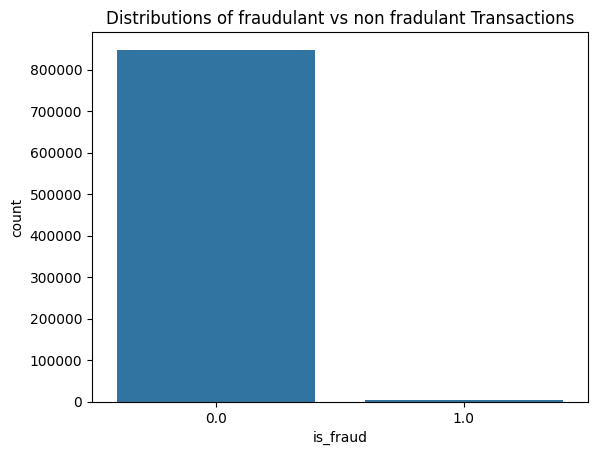

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = data.reset_index(drop=True)

sns.countplot(data=data, x='is_fraud')
plt.title('Distributions of fraudulant vs non fradulant Transactions')
plt.show()

In [ ]:
data.index.duplicated().sum()
data = data.reset_index(drop=True)
data.index.duplicated().sum()

np.int64(0)

3.Visualizing Fraudulent Transactions by Category

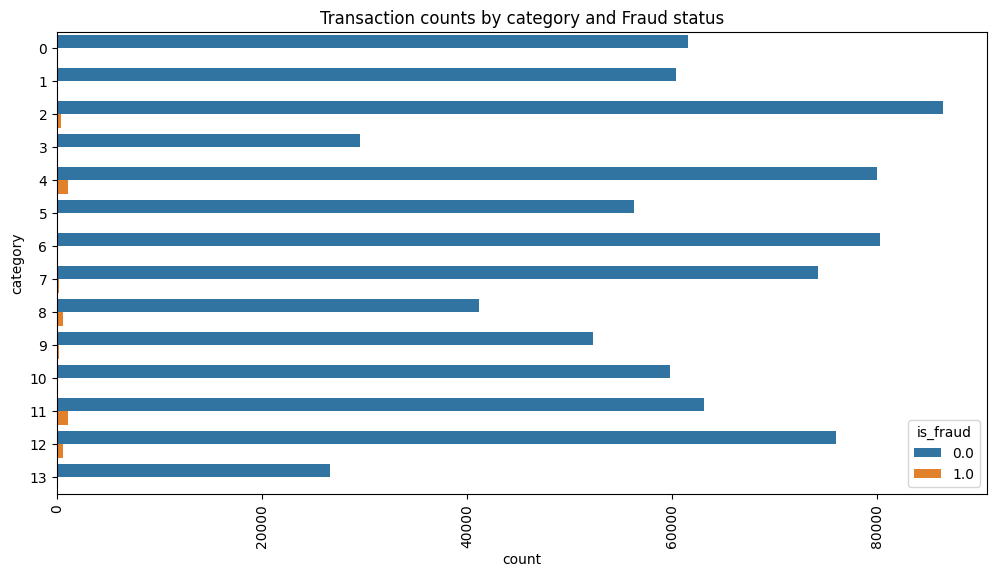

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,y='category',hue='is_fraud')
plt.title('Transaction counts by category and Fraud status')
plt.xticks(rotation=90)
plt.show()

4.Visualizing Fraudulent Transactions by Gender

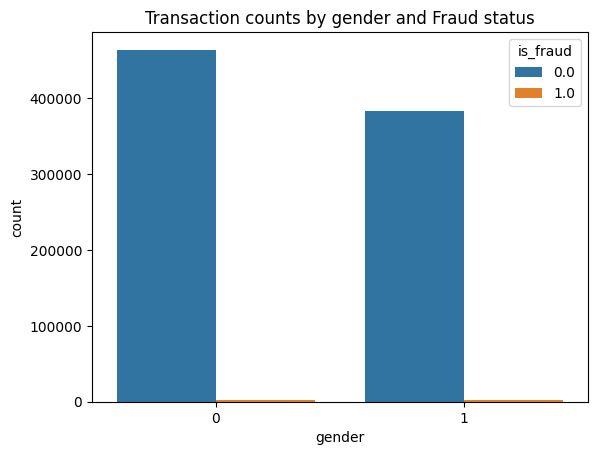

In [ ]:
sns.countplot(data=data,x='gender',hue='is_fraud')
plt.title('Transaction counts by gender and Fraud status')
plt.show()

5.Training and Evaluating a Logistic Regression Model

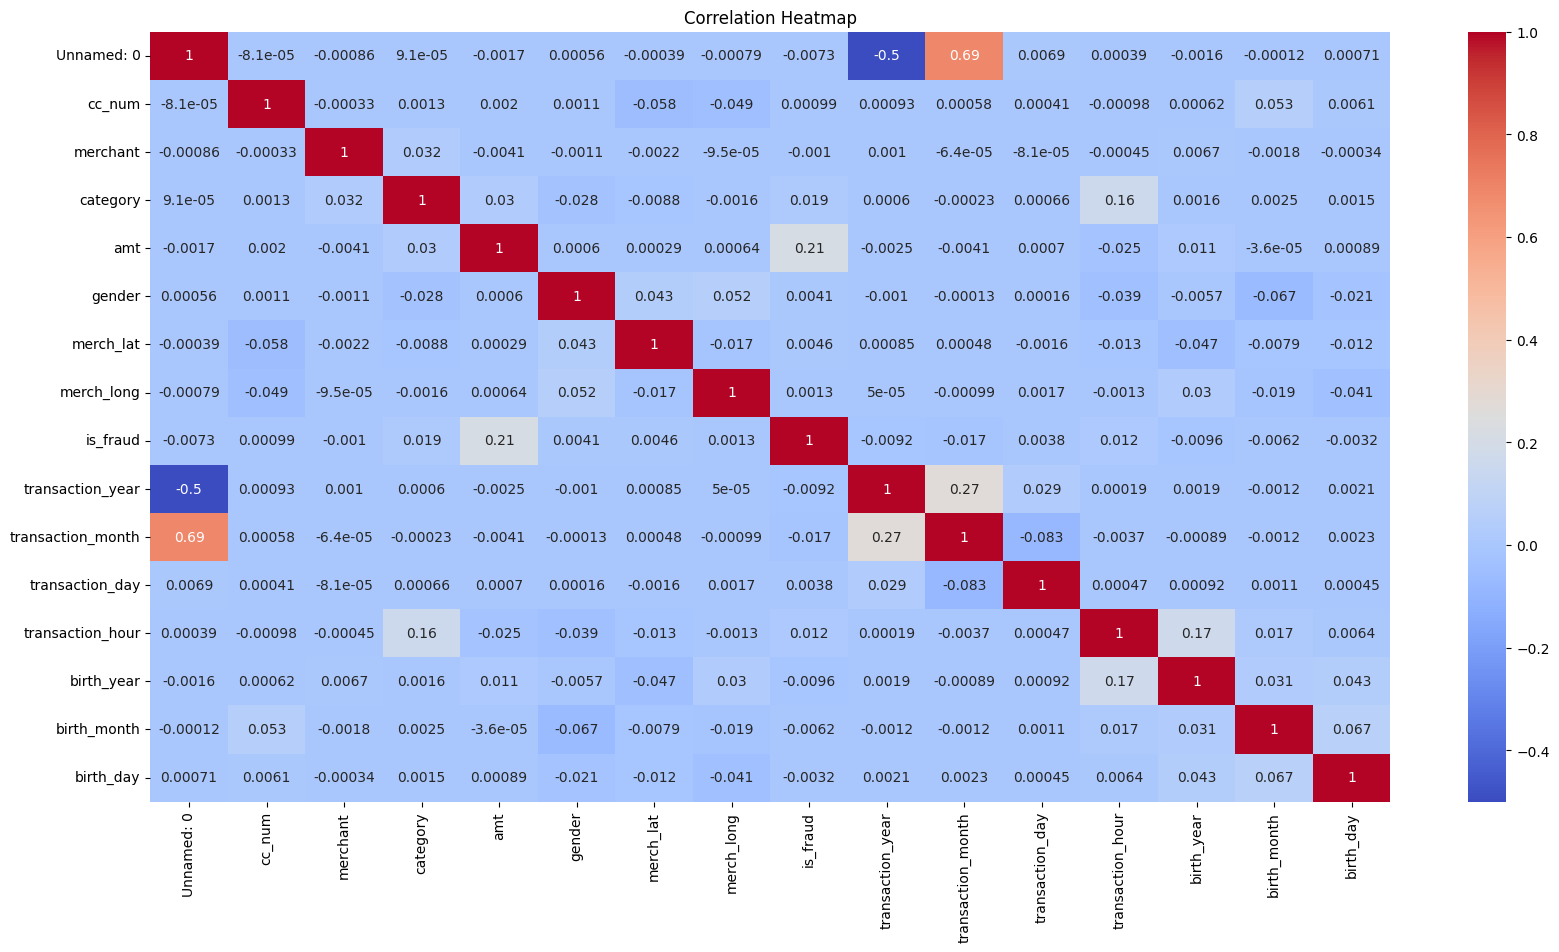

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x = data.drop('is_fraud',axis=1)
y = data['is_fraud']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Training the model for logisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    169614
         1.0       0.00      0.00      0.00       956

    accuracy                           0.99    170570
   macro avg       0.50      0.50      0.50    170570
weighted avg       0.99      0.99      0.99    170570

[[169614      0]
 [   956      0]]


6.Training and Evaluating a Decision Tree Model

In [ ]:
#Training model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[168286   1328]
 [   945     11]]
Accuracy: 0.9866740927478455


7.Training and Evaluating a Logistic Regression Model

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    169614
         1.0       0.00      0.00      0.00       956

    accuracy                           0.99    170570
   macro avg       0.50      0.50      0.50    170570
weighted avg       0.99      0.99      0.99    170570

[[169614      0]
 [   956      0]]
Accuracy: 0.9943952629419007


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
